<a href="https://colab.research.google.com/github/alphadev3296/deep-learning-practice/blob/main/Chapter-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Softmax Cost Function by Pytorch - Low Level
import torch
import torch.nn.functional as F

torch.manual_seed(1)

z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

hypothesis.sum()

z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

y = torch.randint(5, (3,)).long()
print(y)

y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor([0.0900, 0.2447, 0.6652])
tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2, 1])
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])
tensor(1.4689, grad_fn=<MeanBackward0>)


In [ ]:
# Softmax Cost function by Pytorch - High Level
import torch
import torch.nn.functional as F

torch.manual_seed(1)

z = torch.rand(3, 5, requires_grad=True)
y = torch.randint(5, (3,)).long()
print(z)
print(y)
cost = F.cross_entropy(z, y)
print(cost)

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)
tensor([0, 2, 1])
tensor(1.4689, grad_fn=<NllLossBackward0>)


In [ ]:
# Softmax Regression - Low Level
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
  hyperthesis = F.softmax(x_train.matmul(W) + b, dim=1)
  cost = (y_one_hot * -torch.log(hyperthesis)).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

print(W, b)
y_pred = F.softmax(x_train.matmul(W) + b, dim=1)
print(y_pred)
print(torch.argmax(y_pred, dim=1))

torch.Size([8, 4])
torch.Size([8])
torch.Size([8, 3])
Epoch    0/10000 Cost: 1.098612
Epoch 1000/10000 Cost: 0.248155
Epoch 2000/10000 Cost: 0.158821
Epoch 3000/10000 Cost: 0.116604
Epoch 4000/10000 Cost: 0.091797
Epoch 5000/10000 Cost: 0.075553
Epoch 6000/10000 Cost: 0.064124
Epoch 7000/10000 Cost: 0.055659
Epoch 8000/10000 Cost: 0.049145
Epoch 9000/10000 Cost: 0.043981
Epoch 10000/10000 Cost: 0.039789
tensor([[-7.1085,  1.4937,  5.6147],
        [-1.3434, -0.1472,  1.4906],
        [ 8.2364, -2.1073, -6.1291],
        [-3.6180,  3.0360,  0.5820]], requires_grad=True) tensor([[-6.3489, -2.3317,  8.6807]], requires_grad=True)
tensor([[7.9508e-11, 6.5690e-06, 9.9999e-01],
        [1.7811e-04, 1.9474e-02, 9.8035e-01],
        [1.1671e-13, 4.1809e-02, 9.5819e-01],
        [6.1379e-10, 9.6248e-01, 3.7520e-02],
        [7.2622e-02, 9.2453e-01, 2.8516e-03],
        [3.8537e-02, 9.6146e-01, 7.0804e-08],
        [9.1230e-01, 8.7704e-02, 8.1007e-08],
        [9.9212e-01, 7.8797e-03, 5.7659e-11]

In [ ]:
# Softmax Regression - High Level
import torch
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
  z = x_train.matmul(W) + b
  cost = F.cross_entropy(z, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

print(W, b)

Epoch    0/10000 Cost: 1.098612
Epoch 1000/10000 Cost: 0.248155
Epoch 2000/10000 Cost: 0.158821
Epoch 3000/10000 Cost: 0.116604
Epoch 4000/10000 Cost: 0.091797
Epoch 5000/10000 Cost: 0.075553
Epoch 6000/10000 Cost: 0.064124
Epoch 7000/10000 Cost: 0.055659
Epoch 8000/10000 Cost: 0.049145
Epoch 9000/10000 Cost: 0.043981
Epoch 10000/10000 Cost: 0.039789
tensor([[-7.1085,  1.4937,  5.6147],
        [-1.3434, -0.1472,  1.4906],
        [ 8.2364, -2.1073, -6.1292],
        [-3.6180,  3.0360,  0.5820]], requires_grad=True) tensor([[-6.3489, -2.3317,  8.6807]], requires_grad=True)


In [ ]:
# Softmax Regression - nn.Module

torch.manual_seed(1)

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

print(list(model.parameters()))

Epoch    0/10000 Cost: 1.616785
Epoch 1000/10000 Cost: 0.254148
Epoch 2000/10000 Cost: 0.159963
Epoch 3000/10000 Cost: 0.117240
Epoch 4000/10000 Cost: 0.092198
Epoch 5000/10000 Cost: 0.075828
Epoch 6000/10000 Cost: 0.064323
Epoch 7000/10000 Cost: 0.055810
Epoch 8000/10000 Cost: 0.049263
Epoch 9000/10000 Cost: 0.044075
Epoch 10000/10000 Cost: 0.039866
[Parameter containing:
tensor([[-7.2013, -1.3388,  8.2118, -3.4426],
        [ 1.4628, -0.1433, -2.1251,  3.2079],
        [ 5.5949,  1.5000, -6.1479,  0.7484]], requires_grad=True), Parameter containing:
tensor([-6.3093, -2.3680,  8.6286], requires_grad=True)]


In [ ]:
# Softmax Regression - Class
class SoftmaxClassfierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)
  def forward(self, x):
    return self.linear(x)

model = SoftmaxClassfierModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

print(list(model.parameters()))

Epoch    0/10000 Cost: 3.763306
Epoch 1000/10000 Cost: 0.242802
Epoch 2000/10000 Cost: 0.157673
Epoch 3000/10000 Cost: 0.116000
Epoch 4000/10000 Cost: 0.091437
Epoch 5000/10000 Cost: 0.075321
Epoch 6000/10000 Cost: 0.063964
Epoch 7000/10000 Cost: 0.055545
Epoch 8000/10000 Cost: 0.049060
Epoch 9000/10000 Cost: 0.043916
Epoch 10000/10000 Cost: 0.039739
[Parameter containing:
tensor([[-6.9359, -1.4351,  8.3242, -3.5385],
        [ 1.4027, -0.2479, -1.9845,  3.0707],
        [ 5.6138,  1.4349, -6.0303,  0.5713]], requires_grad=True), Parameter containing:
tensor([-6.5382, -2.1440,  8.8081], requires_grad=True)]


device: cuda
Epoch: 0001 cost = 0.573705196
Epoch: 0002 cost = 0.374663025
Epoch: 0003 cost = 0.342829049
Epoch: 0004 cost = 0.325841010
Epoch: 0005 cost = 0.315703392
Epoch: 0006 cost = 0.307818919
Epoch: 0007 cost = 0.302130640
Epoch: 0008 cost = 0.297644258
Epoch: 0009 cost = 0.293441445
Epoch: 0010 cost = 0.290456891
Epoch: 0011 cost = 0.287537634
Epoch: 0012 cost = 0.284987003
Epoch: 0013 cost = 0.283123940
Epoch: 0014 cost = 0.281047672
Epoch: 0015 cost = 0.279267281
Learning finished
Accuracy: 0.8894999623298645
label: 8
prediction: 3


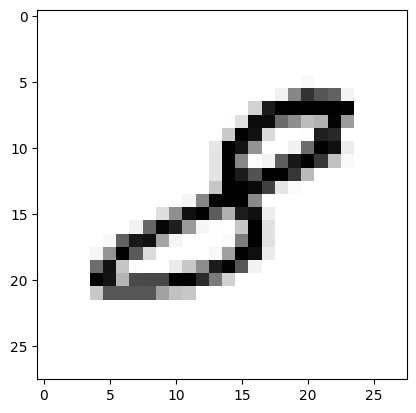

label: 5
prediction: 3


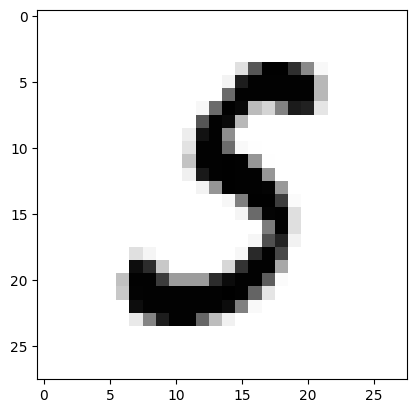

label: 7
prediction: 7


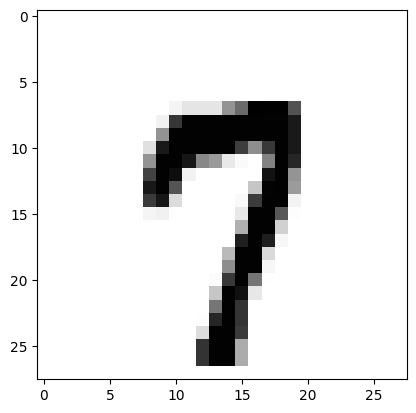

label: 9
prediction: 9


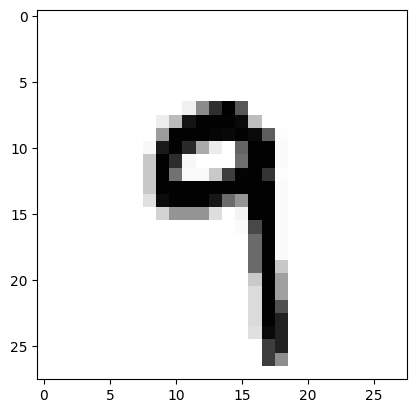

label: 3
prediction: 3


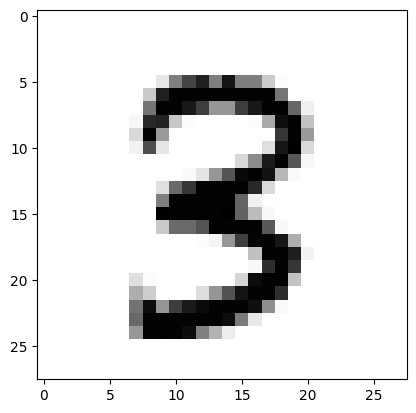

label: 5
prediction: 5


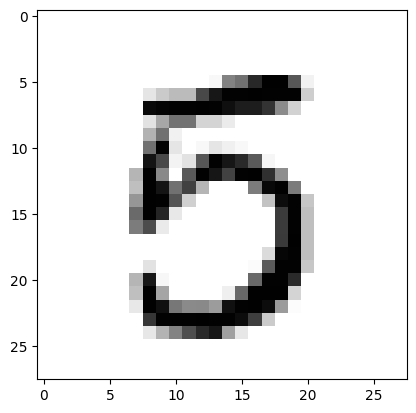

label: 2
prediction: 2


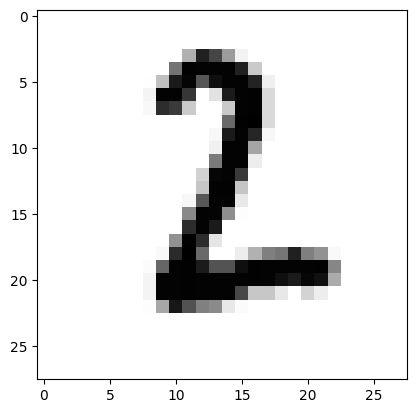

label: 1
prediction: 1


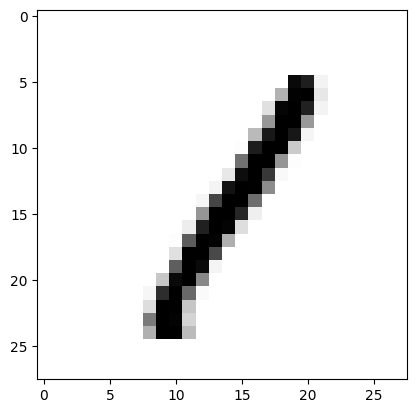

label: 5
prediction: 8


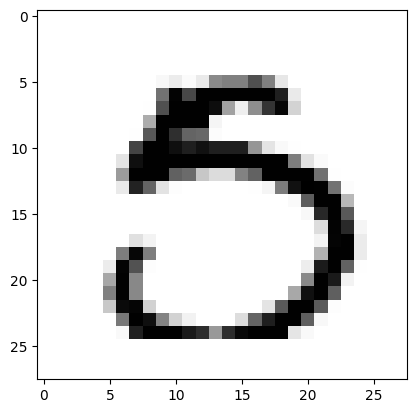

label: 8
prediction: 8


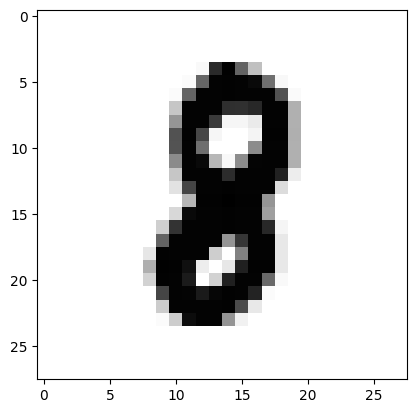

In [3]:
# MNIST Regression

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(f"device: {device}")

random.seed(777)
torch.manual_seed(777)

traning_epochs = 15
batch_size = 128

mnist_train = dsets.MNIST(root="MNIST_data/",
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root="MNIST_data/",
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

linear = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(traning_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    X = X.view(-1, 28 * 28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hyperthesis = linear(X)
    cost = criterion(hyperthesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

with torch.no_grad():
  X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
  Y_test = mnist_test.targets.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  # Select random one from test data
  for i in range(10):
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print(f"label: {Y_single_data.item()}")
    single_prediction = linear(X_single_data)
    print(f"prediction: {torch.argmax(single_prediction, 1).item()}")

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()